In [1]:
import sys
sys.path.append("..")
from preprocess.tile import tile_image
from smart_open import smart_open
import s3fs
from os import path, environ
import rasterio as rio
from re import match
import boto3

from tqdm import tqdm

from numpy.random import randint

from functools import partial

from concurrent import futures

environ['CURL_CA_BUNDLE']='/etc/ssl/certs/ca-certificates.crt'

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


# Tile Large Downloaded Images



In [2]:
# configuration
BUCKET = 'planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307'
AWS_PROFILE = 'esip'
IMG_REGEX = ".*_SR_.*\.tif"

In [3]:
# open s3 as filesystem with boto3 credentials
fs = s3fs.S3FileSystem(session= boto3.Session(profile_name = AWS_PROFILE))

In [4]:
# read files, pull out SR images 
files = fs.walk(BUCKET)
images = [f for f in files if match(IMG_REGEX, f)]

In [5]:
images

['planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/1/files/20180423_181002_100c_3B_AnalyticMS_SR_clip.tif',
 'planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/10/files/20180422_180810_1033_3B_AnalyticMS_SR_clip.tif',
 'planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/10/files/20180422_180810_1033_3B_AnalyticMS_SR_clip_tiled/15/5524/12726.tif',
 'planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/10/files/20180422_180810_1033_3B_AnalyticMS_SR_clip_tiled/15/5524/12727.tif',
 'planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/10/files/20180422_180810_1033_3B_AnalyticMS_SR_clip_tiled/15/5524/12728.tif',
 'planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/10/files/20180422_180810_1033_3B_AnalyticMS_SR_clip_tiled/15/5524/12729.tif',
 'planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/10/files/20180422_180810_10

In [ ]:
# tile all images (takes a while ). WRITES TO s3!
images = images
outputs = []
for image in tqdm(images, total = len(images), unit='image'):
    imsize = fs.info(image, refresh=True)['Size'] 
    outputdir = path.splitext(image)[0] + '_tiled'
    if fs.exists(outputdir):
        print('{} already exists. Delete to re-create.'.format(outputdir))
        continue # skip
        
    if (imsize == 0):
        print("skipping {}, (size:{})".format(image, imsize))
        continue #skip 
        
    try:
        
        
        res = tile_image('s3://'+image,
                         's3://'+outputdir,
                         indexes=[1,2,3,4], zoom=15,
                         quant = 10000,
                         aws_profile = 'esip')
        outputs.append(res)
    except Exception as e:
        outputs.append(e)
        continue 
        


  0%|          | 0/13 [00:00<?, ?image/s]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5500, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5499, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5503, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5498, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5502, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5504, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5505, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5506, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5501, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5507, y=12701, z=15)), skipping...
Blank (nodata) tile (Tile(x=5498, y=12703, z=15)), skipping...
Blank (nodata) tile (Tile(x=5503, y=12702, z=15)), skipping...
Blank (nodata) tile (Tile(x=5500, y=12702, z=15)), skipping...
Blank (nodata) tile (Tile(x=5500, y=12705, z=15)), skipping...
Blank (nodata) tile (Tile

  8%|▊         | 1/13 [00:39<07:54, 39.51s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5539, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5525, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5537, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5524, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5544, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5529, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5543, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5536, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5528, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5535, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5538, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5527, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5532, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5526, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile

 15%|█▌        | 2/13 [02:14<12:17, 67.08s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5530, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5533, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5537, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5525, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5532, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5540, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5528, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5531, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5539, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5534, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5536, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5526, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5535, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5529, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile

 23%|██▎       | 3/13 [03:17<10:58, 65.88s/image]

Blank (nodata) tile (Tile(x=5551, y=12721, z=15)), skipping...
invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5545, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5546, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5547, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5551, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5550, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5549, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5548, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5547, y=12721, z=15)), skipping...
Blank (nodata) tile (Tile(x=5546, y=12721, z=15)), skipping...
Blank (nodata) tile (Tile(x=5551, y=12721, z=15)), skipping...
Blank (nodata) tile (Tile(x=5550, y=12721, z=15)), skipping...
Blank (nodata) tile (Tile(x=5549, y=12721, z=15)), skipping...
Blank (nodata) tile (Tile(x=5549, y=12722, z=15)), skipping...
Blank (nodata) tile (Tile

 31%|███       | 4/13 [03:40<08:15, 55.07s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5549, y=12723, z=15)), skipping...
Blank (nodata) tile (Tile(x=5544, y=12723, z=15)), skipping...
Blank (nodata) tile (Tile(x=5546, y=12723, z=15)), skipping...
Blank (nodata) tile (Tile(x=5545, y=12724, z=15)), skipping...
Blank (nodata) tile (Tile(x=5550, y=12723, z=15)), skipping...
Blank (nodata) tile (Tile(x=5545, y=12725, z=15)), skipping...Blank (nodata) tile (Tile(x=5553, y=12724, z=15)), skipping...

Blank (nodata) tile (Tile(x=5551, y=12723, z=15)), skipping...
Blank (nodata) tile (Tile(x=5549, y=12724, z=15)), skipping...
Blank (nodata) tile (Tile(x=5548, y=12723, z=15)), skipping...
Blank (nodata) tile (Tile(x=5554, y=12724, z=15)), skipping...
Blank (nodata) tile (Tile(x=5552, y=12724, z=15)), skipping...
Blank (nodata) tile (Tile(x=5546, y=12725, z=15)), skipping...
Blank (nodata) tile (Tile(x=5547, y=12723, z=15)), skipping...
Blank (nodata) tile (Tile

 38%|███▊      | 5/13 [04:15<06:48, 51.04s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5505, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5507, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5502, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5501, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5509, y=12698, z=15)), skipping...Blank (nodata) tile (Tile(x=5499, y=12698, z=15)), skipping...

Blank (nodata) tile (Tile(x=5503, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5500, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5506, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5508, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5504, y=12698, z=15)), skipping...
Blank (nodata) tile (Tile(x=5501, y=12699, z=15)), skipping...Blank (nodata) tile (Tile(x=5504, y=12699, z=15)), skipping...

Blank (nodata) tile (Tile(x=5500, y=12699, z=15)), skipping...
Blank (nodata) tile (Tile

 46%|████▌     | 6/13 [04:40<05:27, 46.80s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5530, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5531, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5535, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5537, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5534, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5532, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5533, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5541, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5536, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5540, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5538, y=12735, z=15)), skipping...Blank (nodata) tile (Tile(x=5539, y=12735, z=15)), skipping...

Blank (nodata) tile (Tile(x=5542, y=12735, z=15)), skipping...
Blank (nodata) tile (Tile(x=5531, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile

 54%|█████▍    | 7/13 [04:58<04:15, 42.59s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5533, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5539, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5544, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5532, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5540, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5537, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5542, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5538, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5547, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5550, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5546, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5541, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5552, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5545, y=12729, z=15)), skipping...
Blank (nodata) tile (Tile

 62%|██████▏   | 8/13 [05:53<03:41, 44.24s/image]

Blank (nodata) tile (Tile(x=5544, y=12742, z=15)), skipping...
invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5534, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5536, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5533, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5545, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5538, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5535, y=12720, z=15)), skipping...Blank (nodata) tile (Tile(x=5544, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5540, y=12720, z=15)), skipping...

Blank (nodata) tile (Tile(x=5539, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5547, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5554, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5543, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5552, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile

 69%|██████▉   | 9/13 [07:09<03:10, 47.69s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5536, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5537, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5539, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5545, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5542, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5551, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5538, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5549, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5540, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5546, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5550, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5548, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5547, y=12720, z=15)), skipping...
Blank (nodata) tile (Tile(x=5535, y=12722, z=15)), skipping...
Blank (nodata) tile (Tile

 77%|███████▋  | 10/13 [07:27<02:14, 44.78s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5501, y=12716, z=15)), skipping...
Blank (nodata) tile (Tile(x=5503, y=12716, z=15)), skipping...
Blank (nodata) tile (Tile(x=5504, y=12716, z=15)), skipping...
Blank (nodata) tile (Tile(x=5502, y=12716, z=15)), skipping...
Blank (nodata) tile (Tile(x=5499, y=12716, z=15)), skipping...
Blank (nodata) tile (Tile(x=5500, y=12716, z=15)), skipping...
Blank (nodata) tile (Tile(x=5500, y=12719, z=15)), skipping...Blank (nodata) tile (Tile(x=5500, y=12721, z=15)), skipping...

Blank (nodata) tile (Tile(x=5502, y=12719, z=15)), skipping...
Blank (nodata) tile (Tile(x=5501, y=12719, z=15)), skipping...
Blank (nodata) tile (Tile(x=5504, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5504, y=12719, z=15)), skipping...Blank (nodata) tile (Tile(x=5500, y=12718, z=15)), skipping...
Blank (nodata) tile (Tile(x=5500, y=12720, z=15)), skipping...

Blank (nodata) tile (Tile

 85%|████████▍ | 11/13 [07:46<01:24, 42.40s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5521, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5520, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5526, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5527, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5525, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5532, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5530, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5533, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5531, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5528, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5529, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5538, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5537, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile(x=5534, y=12736, z=15)), skipping...
Blank (nodata) tile (Tile

 92%|█████████▏| 12/13 [08:30<00:42, 42.53s/image]

invalid crs (epsg:32611), reprojecting raster....
reproject successful {'init': 'epsg:4326'}
Blank (nodata) tile (Tile(x=5550, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5524, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5522, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5526, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5527, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5523, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5525, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5530, y=12728, z=15)), skipping...Blank (nodata) tile (Tile(x=5529, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5531, y=12728, z=15)), skipping...

Blank (nodata) tile (Tile(x=5532, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5534, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5533, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile(x=5528, y=12728, z=15)), skipping...
Blank (nodata) tile (Tile

In [30]:
result_dirs_regex = ".*_tiled.*"
files = fs.walk(BUCKET, refresh=True)
result_dirs = [i for i in files if match(result_dirs_regex, i)]

In [37]:
# todo: pull out directory name with _tiled 
path.split(result_dirs[0])

('planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/1/files/20180423_181002_100c_3B_AnalyticMS_SR_clip_tiled/15/5499',
 '12708.tif')

In [4]:
# check results
directories = ['/'.join(d.split('/')[:-3]) for d in fs.walk(BUCKET, refresh=True) if match(".*_tiled.*", d)]

In [7]:
directories = set(directories)

In [8]:
print('dir\ttiles')
for d in directories:
    print("{}\t{}".format(d, len(fs.walk(d))))

dir	tiles
planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/11/files/20180422_180809_1033_3B_AnalyticMS_SR_clip_tiled	120
planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/1/files/20180423_181002_100c_3B_AnalyticMS_SR_clip_tiled	80
planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/6/files/20180423_180735_1009_3B_AnalyticMS_SR_clip_tiled	45
planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/7/files/20180423_181004_100c_3B_AnalyticMS_SR_clip_tiled	51
planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/2/files/20180423_181001_100c_3B_AnalyticMS_SR_clip_tiled	74
planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/3/files/20180423_180738_1009_3B_AnalyticMS_SR_clip_tiled	37
planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/9/files/20180422_180811_1033_3B_AnalyticMS_SR_clip_tiled	178
planet-snowcover-imagery/planet-ord

In [23]:
fs.ls('planet-snowcover-snow')

['planet-snowcover-snow/ASO_3M_SD_USCASJ_20180601',
 'planet-snowcover-snow/ASO_3M_SD_USCASJ_20180601_tiles',
 'planet-snowcover-snow/ASO_3M_SD_USCASJ_20180601_tiles_02']

In [24]:
# attempt to load

In [9]:
sys.path.append("/home/jovyan/work/robosat.pink/")

In [10]:
from robosat_pink.datasets import *

In [222]:
oncat = SlippyMapTilesConcatenation(path='s3://planet-snowcover-imagery/planet-orders/d8737a72-9ac6-4743-ab94-959ebcd46307/5/files/20180423_180736_1009_3B_AnalyticMS_SR_clip_tiled', target='s3://planet-snowcover-snow/ASO_3M_SD_USCAJW_20180423/ASO_3M_SD_USCAJW_20180423-MASK_02-COG')

In [223]:
len(oncat)

183

In [224]:
import matplotlib.pyplot as plt

In [225]:
%matplotlib inline

In [287]:
data = oncat[randint(0, len(oncat))]



In [288]:
data = (data[0].numpy(), data[1])

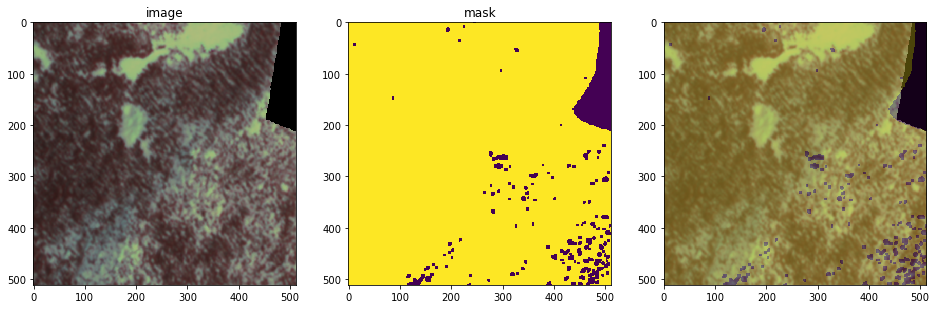

In [289]:

fig, ax = plt.subplots(1, 3, figsize = (16, 8))
#fig.suptitle(data[2])
#ax[0].imshow(np.rollaxis(data[0][[2,1,0], :, :], 0, 3))

cm = plt.cm.viridis
im = ax[0].imshow(np.rollaxis(data[0][[3,2,1], :, :], 0, 3), interpolation='nearest')
#im = ax[0].imshow(data[0][1, :, :], interpolation='nearest', cmap = cm)
#fig.colorbar(im, ax=ax[0], orientation = 'horizontal')
ax[0].set_title("image")


im = ax[1].imshow(data[1].squeeze().astype('uint8'), interpolation='nearest', cmap = cm)

#fig.colorbar(im, ax=ax[1], orientation = 'horizontal')
ax[1].set_title('mask')

im = ax[2].imshow(np.rollaxis(data[0][[3,2,1], :, :], 0, 3), interpolation='nearest')
im = ax[2].imshow(data[1].squeeze().astype('uint8'), interpolation='nearest', cmap = cm, alpha=0.3)




In [117]:
import numpy as np
np.rollaxis(data[0][[3,2,1], :, :], 0, 3).shape

(512, 512, 3)

In [103]:
from PIL import Image

In [104]:
Image.fromarray(data[1].squeeze())

OSError: cannot write mode F as PNG

<PIL.Image.Image image mode=F size=512x512 at 0x7F0C70E98BE0>

In [150]:
np.array(Image.fromarray(data[1].squeeze()).convert("P")).dtype

dtype('uint8')